Points correctly predicted in class 1= 44
Points correctly predicted in class 2= 44
Total Points correctly predicted = 88


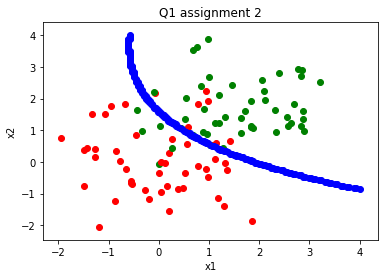

In [1]:
#ques1
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1.5,1.5])
cov1=np.array([[1,0],[0,1]])
cov2=np.array([[0.8,0],[0,0.8]])

class1=[]
class2=[]

for i in range(100):
    class1.append(np.random.multivariate_normal(mean1,cov1))
    class2.append(np.random.multivariate_normal(mean2,cov2))

mean1=np.array([0.0,0.0])
mean2=np.array([0.0,0.0])

cov1=np.array([[0.0,0.0],[0.0,0.0]])
cov2=np.array([[0.0,0.0],[0.0,0.0]])

for i in range(50):
    mean1+=class1[i]
    mean2+=class2[i]

mean1=mean1/50
mean2=mean2/50

for i in range(50):
    cov1[0][0]+=(class1[i][0]-mean1[0])**2
    cov1[1][1]+=(class1[i][1]-mean1[1])**2
    cov1[0][1]+=(class1[i][0]-mean1[0])*(class1[i][1]-mean1[1])
    cov1[1][0]=cov1[0][1]
    
    cov2[0][0]+=(class2[i][0]-mean2[0])**2
    cov2[1][1]+=(class2[i][1]-mean2[1])**2
    cov2[0][1]+=(class2[i][0]-mean2[0])*(class2[i][1]-mean2[1])
    cov2[1][0]=cov2[0][1]
    

cov1=cov1/49
cov2=cov2/49

for i in range(50):
    plt.scatter(class1[i][0],class1[i][1],c='r',label='class1')
    plt.scatter(class2[i][0],class2[i][1],c='g',label='class2')
    

def discriminant(cov, mean,point):
    return(-0.5*np.matmul((point-mean).T,np.matmul(np.linalg.inv(cov),point-mean))-0.5*np.log(abs(np.linalg.det(cov))))

correctly_predicted1=0
correctly_predicted2=0

for i in range(50,100):
    point1=class1[i]
    disc1=discriminant(cov1,mean1,point1)-discriminant(cov2,mean2,point1)
    if(disc1>0):
        correctly_predicted1+=1
    
    point2=class2[i]
    disc2=discriminant(cov1,mean1,point2)-discriminant(cov2,mean2,point2)
    if(disc2<0):
        correctly_predicted2+=1

print("Points correctly predicted in class 1= "+str(correctly_predicted1))
print("Points correctly predicted in class 2= "+str(correctly_predicted2))
print("Total Points correctly predicted = "+str(correctly_predicted1+correctly_predicted2))

varix=np.linspace(-4,4,200)
variy=np.linspace(-4,4,200)

decision_boundary=[]
for i in varix:
    for j in variy:
        if(abs(discriminant(cov1,mean1,(i,j))-discriminant(cov2,mean2,(i,j)))<=0.05):
            decision_boundary.append([i,j])

for i in decision_boundary:
    plt.scatter(i[0],i[1],c='b',label='decision boundary')

plt.xlabel('x1')
plt.ylabel('x2')

plt.title('Q1 assignment 2')
plt.show()

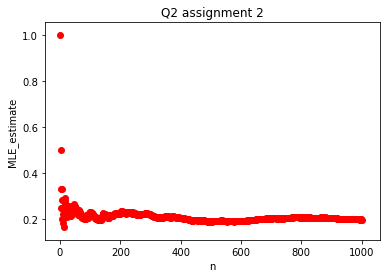

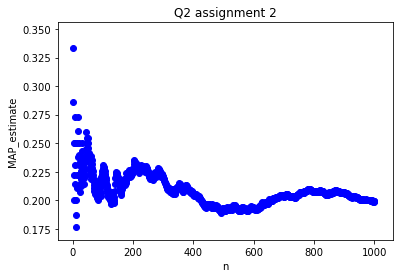

MSE Loss for MLE from range 0 to 100 is 0.249181992718653
MSE Loss for MAP from range 0 to 100 is 0.1021424322893395
MSE Loss for MLE from range 100 to 200 is 0.03112449080573351
MSE Loss for MAP from range 100 to 200 is 0.029181185295219316
MSE Loss for MLE from range 200 to 300 is 0.06762072664299085
MSE Loss for MAP from range 200 to 300 is 0.06490059429609872
MSE Loss for MLE from range 300 to 400 is 0.011104333484405626
MSE Loss for MAP from range 300 to 400 is 0.010786653401495643
MSE Loss for MLE from range 400 to 500 is 0.0030999841685534356
MSE Loss for MAP from range 400 to 500 is 0.0030347042005598067
MSE Loss for MLE from range 500 to 600 is 0.005479628093737491
MSE Loss for MAP from range 500 to 600 is 0.005381158077891431
MSE Loss for MLE from range 600 to 700 is 0.0017043626689630415
MSE Loss for MAP from range 600 to 700 is 0.0016776180766658903
MSE Loss for MLE from range 700 to 800 is 0.004036613904477879
MSE Loss for MAP from range 700 to 800 is 0.003984478272257237


In [28]:
#ques2
import numpy as np
import matplotlib.pyplot as plt
data=np.random.binomial(n=1,p=0.2,size=1000)

mle_estimate=np.sum(data)/1000
mle_vs_n=[]

for i in range(1,1001):
    mle_vs_n.append((i,np.sum(data[:i])/i))
    
for i in mle_vs_n:
    plt.scatter(i[0],i[1],c='r')

plt.xlabel('n')
plt.ylabel('MLE_estimate')
plt.title('Q2 assignment 2')
plt.show()

map_vs_n=[]
alpha=2
beta=5

for i in range(1,1001):
    map_vs_n.append((i,(np.sum(data[:i])+alpha-1)/(i+alpha+beta-2)))

for i in map_vs_n:
    plt.scatter(i[0],i[1],c='b')

plt.xlabel('n')
plt.ylabel('MAP_estimate')
plt.title('Q2 assignment 2')
plt.show()

#for calculating mse loss in mle and map estimates 
#not asked in ques but i am doing so to know what values of n will be good for a good estimate
loss_mle=0
loss_map=0
for i in range(1,1001):
    if(i%100==0):
        print("MSE Loss for MLE from range "+str((i-100))+" to "+str(i)+" is "+str(loss_mle))
        print("MSE Loss for MAP from range "+str((i-100))+" to "+str(i)+" is "+str(loss_map))
        loss_mle=0
        loss_map=0
    else:
        loss_mle+=(0.2-mle_vs_n[i][1])**2
        loss_map+=(0.2-map_vs_n[i][1])**2


map_estimate=map_vs_n[-1][1]

print("MLE ESTIMATE: "+str(mle_estimate))
print("MAP ESTIMATE: "+str(map_estimate))

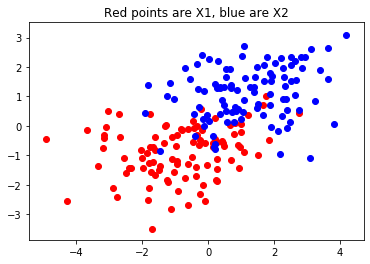

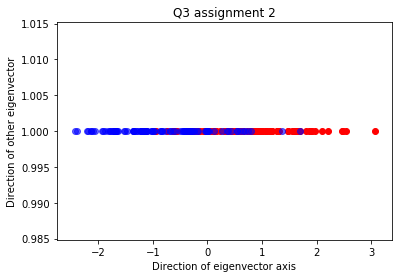

Mse loss is 1.704147145520843


In [33]:
#ques3
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

X1=[]
X2=[]

mean1=np.array([-1,-1])
mean2=np.array([1,1])
cov=np.array([[2,0.5],[0.5,1]])

for i in range(100):
    X1.append(np.random.multivariate_normal(mean1,cov))
    X2.append(np.random.multivariate_normal(mean2,cov))

X1=np.array(X1)
X1=X1.T
X2=np.array(X2)
X2=X2.T

Z=np.concatenate((X1,X2),axis=1)
Z=np.array(Z)

for i in X1.T:
    plt.scatter(i[0],i[1],c='r')
for i in X2.T:
    plt.scatter(i[0],i[1],c='b')
    
plt.title('Red points are X1, blue are X2')
plt.show()


mean_z=np.array([[0.0],[0.0]])

for i in Z.T:
    mean_z[0]+=i[0]
    mean_z[1]+=i[1]

mean_z/=len(Z.T)

X=np.array(Z-mean_z)
X=X.T

S=np.array([[0.0,0.0],[0.0,0.0]])

for i in X.T:
    S[0][0]+=(i[0])**2
    S[1][1]+=(i[1])**2
    S[0][1]+=(i[0])*(i[1])
    S[1][0]=S[0][1]

S/=200
w,v=la.eig(S)

to_sort=[]
for i in range(len(w)):
    to_sort.append((w[i],v[i]))

to_sort.sort(reverse=True)

U=[]
X=X.T
for i in to_sort:
    U.append(i[1])

Y=np.dot(U[0],X)
Y1=np.dot(U[0],X1)
Y2=np.dot(U[0],X2)

for i in Y1:
    plt.scatter(i,1,c='r')
for i in Y2:
    plt.scatter(i,1,c='b',alpha='0.6')
    
plt.xlabel('Direction of eigenvector axis')
plt.ylabel("Direction of other eigenvector")
plt.title("Q3 assignment 2")
plt.show()

X_reconstructed=np.matmul(U[0].reshape(2,1),Y.reshape(1,200))
Z_reconstructed=X_reconstructed+mean_z

MSE=np.sum((Z_reconstructed-Z)**2,axis=1)/200
print("Mse loss is "+str((MSE[0]+MSE[1])/2))
